<a href="https://colab.research.google.com/github/dnsm96/Glassdoor-Salary-prediction/blob/main/Glassdoor_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/LinearRegression/NLP/RandomForestRegression
##### **Contribution**    - Individual


# **Project Summary -**

In today's rapidly evolving tech industry, understanding salary trends is crucial for job seekers, employers, and policymakers. Compensation varies significantly based on job roles, company size, experience, and location, making it essential to analyze patterns that impact salary structures.

This project leverages job postings data from Glassdoor.com (2017) to predict salaries for various tech job positions. The dataset includes key features such as job title, company size, and job location, which can be used to identify salary trends, compare roles across industries, and provide valuable insights into compensation expectations.



# **GitHub Link -**

# **Problem Statement**


- How does salary vary by job position (e.g., Data Scientist vs. Software Engineer vs. DevOps Engineer)?

- What is the impact of company size on salary levels?
How do salaries differ by location (e.g., San Francisco vs. Austin vs. New York)?

- Can we build a predictive model to estimate salaries based on job attributes?

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Dataset Loading

In [5]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/glassdoor_jobs.csv')


### Dataset First View

In [6]:
# Dataset First Look
df.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(956, 15)

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Unnamed: 0,0
Job Title,0
Salary Estimate,0
Job Description,0
Rating,0
Company Name,0
Location,0
Headquarters,0
Size,0
Founded,0


In [11]:
# Visualizing the missing values

### What did you know about your dataset?

- The Dataset has Jobtitles and its relevant informations like Job description, salary range, job location and as such.

- The Dataset has total 956 rows and 15 columns

- There are no null/missing values in the dataset

- There are no duplicate entries in the dataset

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


### Variables Description



| **Column Name**      | **Description** |
|----------------------|----------------|
| `Unnamed: 0`        | Index column, likely an artifact from saving the dataset. |
| `Job Title`         | The title of the job position (e.g., Data Scientist). |
| `Salary Estimate`   | Estimated salary range based on Glassdoor data. |
| `Job Description`   | Description of job responsibilities and requirements. |
| `Rating`            | Company rating on Glassdoor (e.g., 3.8). |
| `Company Name`      | Name of the hiring company. |
| `Location`          | Job location (city, state). |
| `Headquarters`      | Location of the company's headquarters. |
| `Size`              | Number of employees in the company. |
| `Founded`          | Year the company was founded. |
| `Type of ownership` | Company type (e.g., Private, Public, Government). |
| `Industry`         | Industry the company operates in (e.g., Aerospace & Defense). |
| `Sector`           | Broad sector category (e.g., Aerospace & Defense). |
| `Revenue`          | Estimated company revenue range. |
| `Competitors`      | Competitors in the same industry (-1 might indicate no data available). |



### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
variables = ['Job Title', 'Company Name', 'Location', 'Headquarters',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',]

for variable in variables:
  print(f'Unique variables in {variable} are {df[variable].unique()}','\n')

Unique variables in Job Title are ['Data Scientist' 'Healthcare Data Scientist' 'Research Scientist'
 'Staff Data Scientist - Technology' 'Data Analyst' 'Data Engineer I'
 'Scientist I/II, Biology' 'Customer Data Scientist'
 'Data Scientist - Health Data Analytics'
 'Senior Data Scientist / Machine Learning'
 'Data Scientist - Quantitative' 'Digital Health Data Scientist'
 'Associate Data Analyst' 'Clinical Data Scientist'
 'Data Scientist / Machine Learning Expert' 'Web Data Analyst'
 'Senior Data Scientist' 'Data Engineer'
 'Data Scientist - Algorithms & Inference' 'Scientist'
 'Data Science Analyst' 'Lead Data Scientist'
 'Spectral Scientist/Engineer'
 'College Hire - Data Scientist - Open to December 2019 Graduates'
 'Data Scientist, Office of Data Science' 'Business Intelligence Analyst'
 'Senior Risk Data Scientist'
 'Data Scientist in Artificial Intelligence Early Career'
 'Data Scientist - Research' 'R&D Data Analysis Scientist'
 'Analytics Consultant' 'Director, Data Science' 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# dropping the Unnamed: 0 column, as it is of no significance

df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [16]:
# -1 in competitors are missing values, hence substituting the values with NA
df['Competitors'] = df['Competitors'].replace('-1',pd.NA)


In [17]:
df[['Minimum Salary', 'Maximum Salary']] = df['Salary Estimate'].str.replace(r'\s*\(Glassdoor est.\)', '', regex=True).str.replace("$", "").str.replace("K", "000").str.split("-", expand=True)


In [18]:
df['Maximum Salary'] = df['Maximum Salary'].str.replace(r'\(Employer est.\)', '', regex = True)
df['Minimum Salary'] = df['Minimum Salary'].str.replace(r'\(Employer est.\)', '', regex = True)

In [19]:
# Remove non-numeric characters
df['Maximum Salary'] = df['Maximum Salary'].str.extract(r'(\d+\.?\d*)')[0].astype(float)
df['Minimum Salary'] = df['Minimum Salary'].str.extract(r'(\d+\.?\d*)')[0].astype(float)

In [20]:
df['Average Salary'] = (df['Maximum Salary'] + df['Minimum Salary'])/2

In [21]:
df[['Company Name clean','Company Rating']] = df['Company Name'].str.split('\n', expand=True)
df['Company Rating'] = df['Company Rating'].astype(float)

In [22]:
#dropped company rating as a seprate column for Rating already exists

df.drop('Company Rating', inplace = True, axis =1)

In [23]:
#Replacing all -1 values from Founded to nan
df['Founded'] = df['Founded'].replace(-1,np.nan)

In [24]:
# calculating company age

df['Company age'] = 2025 - df['Founded']

In [25]:
#extracting minimum and maximum number of employees

df[['Min_emp','Max_emp']] = df['Size'].str.split(' to ', expand =True)
df['Min_emp'] = pd.to_numeric(df['Min_emp'].str.replace(r'\D','',regex=True), errors='coerce').astype('Int64')

df['Max_emp'] = pd.to_numeric(df['Max_emp'].fillna(0).str.split(' ').str[0], errors='coerce').fillna(0).astype(int)

In [26]:
df['Average_emp'] = abs((df['Max_emp'] + df['Min_emp'])/2)

In [27]:
Cleaned_df = df.copy()

In [28]:
Cleaned_df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Minimum Salary', 'Maximum Salary', 'Average Salary',
       'Company Name clean', 'Company age', 'Min_emp', 'Max_emp',
       'Average_emp'],
      dtype='object')

In [29]:
#Company Paying the maximum salary

Cleaned_df[Cleaned_df['Maximum Salary'] == max(Cleaned_df['Maximum Salary'])]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Revenue,Competitors,Minimum Salary,Maximum Salary,Average Salary,Company Name clean,Company age,Min_emp,Max_emp,Average_emp
452,"Director II, Data Science - GRM Actuarial",$202K-$306K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912.0,Company - Private,...,$10+ billion (USD),"Travelers, Allstate, State Farm",202000.0,306000.0,254000.0,Liberty Mutual Insurance,113.0,10000,0,5000.0
675,"Director II, Data Science - GRM Actuarial",$202K-$306K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912.0,Company - Private,...,$10+ billion (USD),"Travelers, Allstate, State Farm",202000.0,306000.0,254000.0,Liberty Mutual Insurance,113.0,10000,0,5000.0
913,"Director II, Data Science - GRM Actuarial",$202K-$306K (Glassdoor est.),Advance your career at Liberty Mutual Insuranc...,3.3,Liberty Mutual Insurance\n3.3,"Chicago, IL","Boston, MA",10000+ employees,1912.0,Company - Private,...,$10+ billion (USD),"Travelers, Allstate, State Farm",202000.0,306000.0,254000.0,Liberty Mutual Insurance,113.0,10000,0,5000.0


In [30]:
#Companies paying the least salary
Cleaned_df[Cleaned_df['Minimum Salary'] == min(Cleaned_df['Minimum Salary'])]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Revenue,Competitors,Minimum Salary,Maximum Salary,Average Salary,Company Name clean,Company age,Min_emp,Max_emp,Average_emp
523,"Senior Operations Data Analyst, Call Center Op...",$10-$17 Per Hour(Glassdoor est.),Summary\n\n\nIndependent contributor role that...,2.7,FLEETCOR\n2.7,"Nashville, TN","Peachtree Corners, GA",5001 to 10000 employees,2000.0,Company - Public,...,$2 to $5 billion (USD),<NA>,10.0,17.0,13.5,FLEETCOR,25.0,5001,10000,7500.5
787,"Senior Operations Data Analyst, Call Center Op...",$10-$17 Per Hour(Glassdoor est.),Summary\n\n\nIndependent contributor role that...,2.7,FLEETCOR\n2.7,"Nashville, TN","Peachtree Corners, GA",5001 to 10000 employees,2000.0,Company - Public,...,$2 to $5 billion (USD),<NA>,10.0,17.0,13.5,FLEETCOR,25.0,5001,10000,7500.5


In [31]:
#Highest Rated Companies

Cleaned_df[Cleaned_df['Rating']==5.0]['Company Name clean'].unique()

array(['Brightside', 'BPA Services', 'Alector', 'Gridiron IT',
       'Hamilton Porter LLC', 'Aptonet Inc', 'Genesis Research', '605',
       'NS8', 'Freedman Healthcare', 'Senti Biosciences',
       'Royce Geospatial', 'Quality Consulting Group',
       'Edison Software, Inc.', 'SkySync',
       'HireResources a Tailored Solutions Company (WO)', 'Jobot'],
      dtype=object)

In [32]:
#Oldest company
Cleaned_df[Cleaned_df['Company age']== max(Cleaned_df['Company age'])]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Revenue,Competitors,Minimum Salary,Maximum Salary,Average Salary,Company Name clean,Company age,Min_emp,Max_emp,Average_emp
347,Data Scientist,$95K-$161K (Glassdoor est.),Overview\n\n\nAt Sotheby’s we use data science...,3.6,Sotheby's\n3.6,"New York, NY","New York, NY",1001 to 5000 employees,1744.0,Company - Public,...,$500 million to $1 billion (USD),<NA>,95000.0,161000.0,128000.0,Sotheby's,281.0,1001,5000,3000.5


In [33]:
#Youngest Company
Cleaned_df[Cleaned_df['Company age']== min(Cleaned_df['Company age'])]['Company Name clean'].unique()

array(['Sapphire Digital', 'Hamilton Porter LLC', 'U.Group'], dtype=object)

In [34]:
#Highest number of employess
Cleaned_df[Cleaned_df['Max_emp'] == max(Cleaned_df['Max_emp'])]['Company Name clean'].unique()

array(['ManTech', 'The Hanover Insurance Group', 'Juniper Networks',
       'Sartorius', 'Edgewell Personal Care', 'Intrado',
       'Johns Hopkins University Applied Physics Laboratory',
       'TransUnion', 'MITRE', 'Autodesk', 'Insight Enterprises, Inc.',
       'BlueCross BlueShield of Tennessee', 'MassMutual', 'Tower Health',
       'BWX Technologies', 'Reynolds American', 'Genesys',
       'AmeriHealth Caritas', 'FLEETCOR', 'Mentor Graphics',
       'Maxar Technologies'], dtype=object)

In [35]:
Cleaned_df['Size'] = Cleaned_df['Size'].replace('-1',np.nan)
Cleaned_df['Size'] = Cleaned_df['Size'].replace('Unknown',np.nan)

### What all manipulations have you done and insights you found?

- Removed a column named 'Unknown :0' as it was of no significance

- Competitors column had a value that is '-1', which is just missing values. Hence replaced it with NaN

- Extracted maximum and minimun salary from salary range and created a new column that is Avergae Salary using minimum and maximum salary

- Extracted clean company name from Company name column, as it was combined with company rating

- Created a new column -> company Age using the founded column

- Extracted minimum and maximum number of employees from size column and created a new column -> Average number of employees using minimum and maximum number of employees

**Insights:**

- The highest salary is being paid by the compay Liberty Mutual Insurance	with average salary of 25400 and the highest salary is 306000

- The lowest paid salary is 10 by the company FLEETCOR with average salary 13.5

- Highest Rated companies
       'Brightside', 'BPA Services', 'Alector', 'Gridiron IT',
       'Hamilton Porter LLC', 'Aptonet Inc', 'Genesis Research', '605',
       'NS8', 'Freedman Healthcare', 'Senti Biosciences',
       'Royce Geospatial', 'Quality Consulting Group',
       'Edison Software, Inc.', 'SkySync',
       'HireResources a Tailored Solutions Company (WO)', 'Jobot'

- Oldest company in our dataset is Sotheby's

- Youngest companies in our dataset are Sapphire Digital, Hamilton Porter LLC, U.Group

- Companies with employees more than 10000 are

       'ManTech', 'The Hanover Insurance Group', 'Juniper Networks',
       'Sartorius', 'Edgewell Personal Care', 'Intrado',
       'Johns Hopkins University Applied Physics Laboratory',
       'TransUnion', 'MITRE', 'Autodesk', 'Insight Enterprises, Inc.',
       'BlueCross BlueShield of Tennessee', 'MassMutual', 'Tower Health',
       'BWX Technologies', 'Reynolds American', 'Genesys',
       'AmeriHealth Caritas', 'FLEETCOR', 'Mentor Graphics',
       'Maxar Technologies'

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

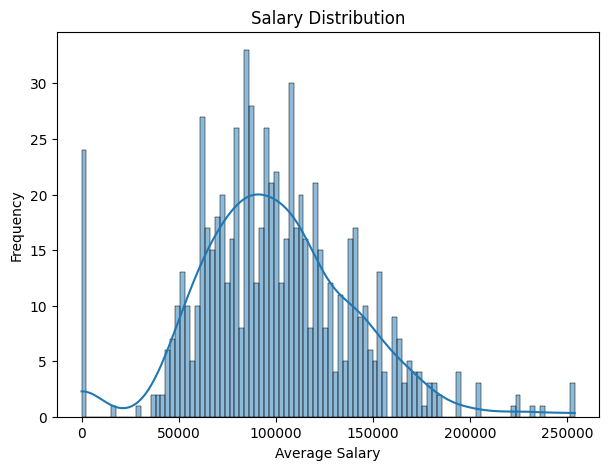

In [36]:
# Chart - 1 visualization code
plt.figure(figsize=(7,5))
sns.histplot(Cleaned_df['Average Salary'], bins = 100, kde = True)
plt.title('Salary Distribution')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

Visualizing Distribution: Histograms are excellent for showing the distribution of numeric data. By breaking down the data into bins, you can quickly spot trends like skewness, outliers, or clusters in the average salaries.

Adding KDE for Smoothness: The KDE curve adds a smooth, continuous line representing the probability density function of the salaries, making it easier to grasp the overall pattern in the data.

**Right-Skewed Distribution**:

The chart indicates that the majority of salaries are concentrated in the lower range, with very few salaries in the higher range.

A peak is observed in the range of 50,000 to 100,000, indicating this is the most common salary band.

**Salary Inequality**:

The tail extending to the right shows that a small portion of employees earn significantly higher salaries, highlighting a potential disparity in income distribution.Answer Here

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the salary distribution allows businesses to ensure that the majority of their compensation packages align with market trends, improving employee satisfaction and retention.

**Insights Leading to Negative Growth**

The right-skewed distribution suggests salary inequality, which could lead to frustration and dissatisfaction among employees in the lower salary range. Over time, this might increase turnover rates or reduce productivity.

#### Chart - 2

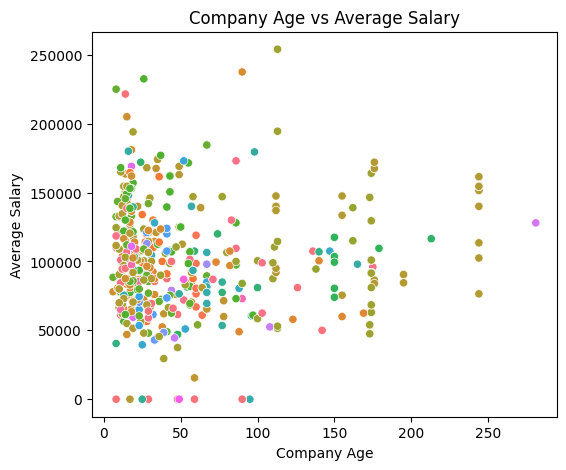

In [37]:
plt.figure(figsize=(6,5))
sns.scatterplot(data = Cleaned_df, x='Company age', y = 'Average Salary', hue = 'Industry')
plt.legend([],[], frameon =False)
plt.title('Company Age vs Average Salary')
plt.xlabel('Company Age')
plt.ylabel('Average Salary')
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot is well-suited to explore the relationship between two numerical variables—in this case, "Company age" and "Average Salary." By plotting each company as a point, you can discern patterns, clusters, and outliers that might not be visible using summary statistics alone.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows a wide spread of Average Salaries (ranging from ~0 to ~250,000) across Company Ages (from ~0 to ~250 years). There is no clear linear trend indicating that older companies consistently pay higher salaries. For example, younger companies (0-50 years) have salaries ranging from low (below 50,000) to high (above 200,000), while older companies (100-250 years) also show a mix of low and high salaries. This suggests that company age alone is not a strong determinant of salary levels



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding that salary doesn’t strictly correlate with company age allows businesses to benchmark compensation based on industry standards rather than assuming older companies pay more. For example, a young company in a high-paying industry (e.g., tech) can attract talent by offering competitive salaries, even if it lacks the longevity of competitors.



#### Chart - 3

<ipython-input-38-846d69a1fe69>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = Cleaned_df, x = 'Size', order = Cleaned_df['Size'].value_counts().index, palette='husl')


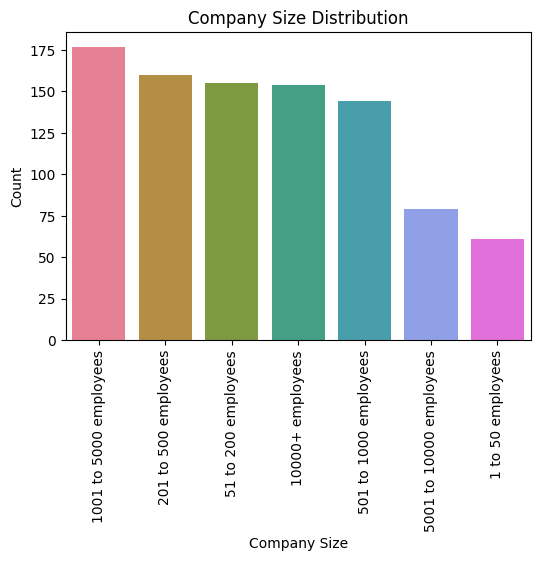

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(data = Cleaned_df, x = 'Size', order = Cleaned_df['Size'].value_counts().index, palette='husl')
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Clarity in Categorical Distribution: A count plot (bar chart) is ideal for showcasing the frequency distribution across distinct categories. In this case, it visualizes how many companies fall into each "Company Size" group

##### 2. What is/are the insight(s) found from the chart?

Dominant Company Size Category: The chart clearly identifies a particular size group (for example, "1001 to 5000 employees") as the most populated segment. This indicates that mid-sized companies form the bulk of the dataset.

Underrepresented Segments: Categories like "1 to 50 employees" or other extremes (either very small or very large companies) appear as having fewer counts. This contrast highlights that the business environment in your dataset is not uniformly spread across all company sizes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Targeted Marketing and Sales Strategies: With the insight that mid-sized companies are most common, businesses can tailor their offerings and marketing strategies to cater to this dominant group. This focus can lead to more efficient resource allocation and higher conversion rates.

**Overdependence on a Single Segment:** If a business overly concentrates on mid-sized companies (like the "1001 to 5000 employees" segment), it might become vulnerable if market dynamics shift. For example:

**Justification:** In times of economic volatility, if mid-sized companies cut back on investments or scale down operations, the business could experience a significant downturn due to its narrow focus.

#### Chart - 4

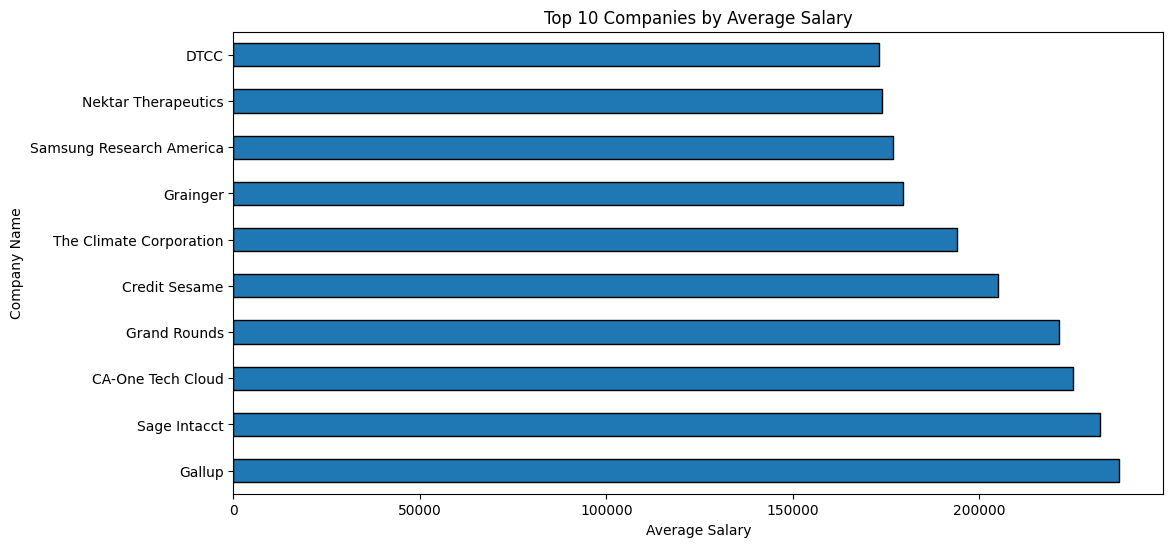

In [39]:
plt.figure(figsize=(12, 6))
top_companies = Cleaned_df.groupby('Company Name clean')['Average Salary'].mean().nlargest(10)
top_companies.plot(kind='barh', edgecolor='black')
plt.title('Top 10 Companies by Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Company Name')
plt.show()

##### 1. Why did you pick the specific chart?

**Effective Ranking and Comparison:** A horizontal bar chart excels at displaying rankings where company names—which can be lengthy or complex—are clearly visible on the y-axis. This orientation ensures readability and easy comparison of average salary values across companies.

##### 2. What is/are the insight(s) found from the chart?

**Identification of Top Paying Companies:** The chart highlights which companies offer the highest average salaries. This ranking offers a benchmark for what is possible within certain industries or regions.

**Salary Disparity**: By observing the range of average salaries, one can gauge the extent of differences between the top performers. A wide gap between the highest and the lower end among the top 10 hints at significant disparities in compensation strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Benchmarking and Talent Attraction:** Companies aiming to attract top talent can use these insights to benchmark their compensation policies against industry leaders. By aligning with—or strategically differentiating from—the top salary ranges, organizations can improve their competitive positioning in the talent market.

**Risk of Unsustainable Wage Bills**: High average salaries, while attractive for talent, can also mean substantially higher personnel costs.

**Justification:** If companies emulate these high salary levels without corresponding increases in revenue or productivity, it could lead to unsustainable running costs. Over time, this might compress profit margins, reducing resources for other growth-driving initiatives.

#### Chart - 5

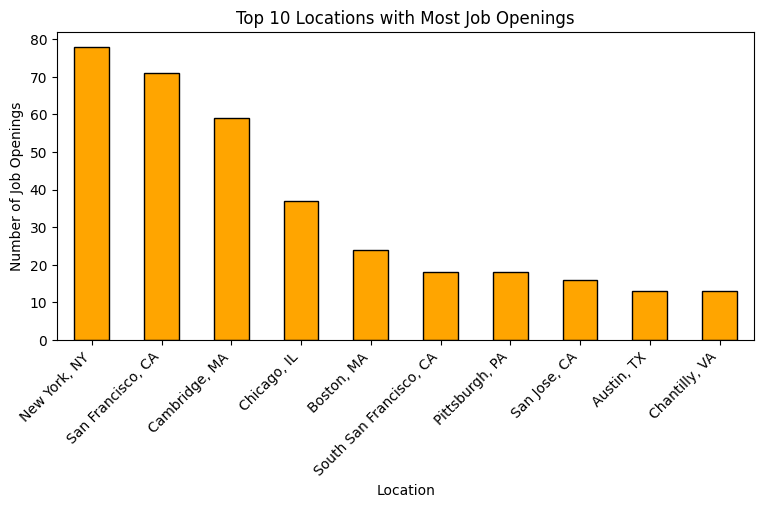

In [40]:
plt.figure(figsize=(9, 4))
location_counts = df['Location'].value_counts().nlargest(10)  # Top 10 locations
location_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Locations with Most Job Openings')
plt.xlabel('Location')
plt.ylabel('Number of Job Openings')
plt.show()

##### 1. Why did you pick the specific chart?

**Clear Categorical Comparison:** A bar chart is perfect for comparing frequencies across distinct categories. Here, it visualizes the top 10 locations by the number of job openings, making it easy to see which regions are most active.

##### 2. What is/are the insight(s) found from the chart?

**Identification of High-Demand Areas:** The chart clearly shows the top 10 locations with the most job openings. This indicates that certain hubs—likely major metropolitan areas—are driving a significant share of the job market activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Targeted Recruitment and Expansion:** Businesses can use this information to focus their recruitment efforts in high-activity regions, enhancing the likelihood of attracting top talent where job openings are abundant.

**Risk of Market Saturation:** A heavy concentration of job openings in just a few locations may indicate market saturation.

**Justification:** For businesses focusing exclusively on these crowded areas, high competition for talent can drive up costs (e.g., wage inflation) and may lead to diminishing returns on recruitment investments

#### Chart - 6

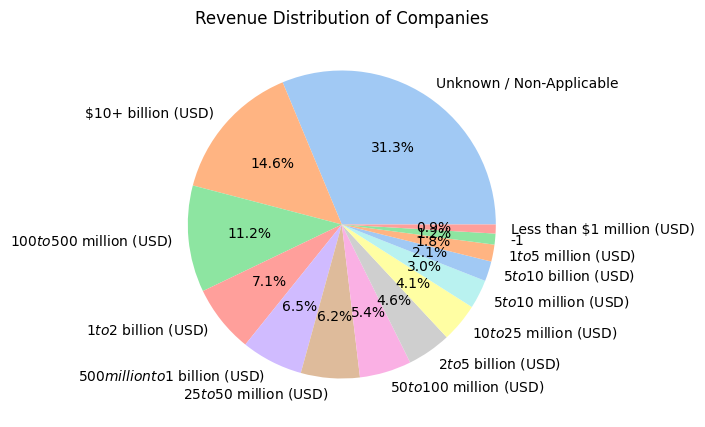

In [41]:
plt.figure(figsize=(8, 5))
df['Revenue'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Revenue Distribution of Companies')
plt.ylabel('')  # Hide y-axis label
plt.show()

##### 1. Why did you pick the specific chart?

 A pie chart is ideal for showcasing how different revenue categories contribute to the overall whole. It offers an instant visual impression of how companies are distributed across various revenue brackets.

##### 2. What is/are the insight(s) found from the chart?

**Revenue Concentration:** The pie chart reveals the relative weight of each revenue category. For instance, you might find that a significant percentage of companies fall within a particular revenue range (e.g., many companies may cluster in the low-to-medium revenue brackets, or conversely, a few high-revenue companies might dominate the market share).

**Data Gaps or Anomalies:** If a notably large segment is labeled as “Unknown” or “Non-Applicable,” it suggests that a substantial portion of the dataset lacks proper revenue reporting. This signals a potential issue with data completeness or transparency.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing the revenue distribution helps businesses align their strategies with the prevailing segments. For example, if a majority of companies are in a particular revenue bracket, services, products, or partnerships can be tailored to meet the specific needs of that segment.

**Data Quality Concerns:** A large “Unknown” or “Non-Applicable” segment may indicate gaps in revenue reporting.

**Justification:** Relying on incomplete data can lead to misleading conclusions. If strategic decisions are based on this poor data quality, resources may be misallocated, potentially stifling positive growth or even leading to losses.

#### Chart - 7

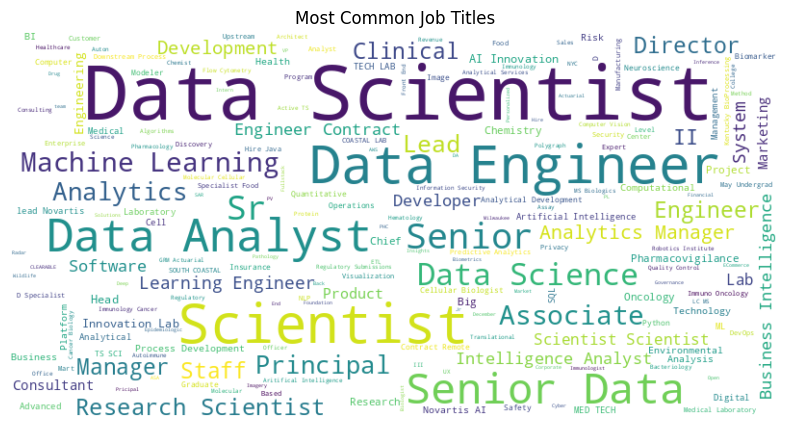

In [42]:
from wordcloud import WordCloud

text = ' '.join(df['Job Title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Job Titles')
plt.show()


##### 1. Why did you pick the specific chart?

A word cloud is a powerful yet simple way to represent text data. By scaling word size relative to frequency, it immediately highlights which job titles occur most often in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The word cloud reveals which job titles appear most frequently in your dataset. For example, if titles like "Data Scientist," "Data Analyst," "Machine Learning Engineer," or "Senior Data Scientist" appear larger, you immediately know these roles are in high demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the most popular job titles can allow companies to tailor their talent acquisition strategies. For instance, if certain roles are highly demanded, a business might adjust compensation packages, refine their job listings, or invest in targeted sourcing efforts.

While the word cloud highlights dominant roles, it might create a bias where companies focus solely on these common titles.

**Justification:** This narrow focus can cause businesses to overlook emerging or niche roles that, although less frequent, could be critical for future innovation or competitive advantage. Overemphasis may lead to saturation where the competition for these in-demand roles drives up salary expectations without a corresponding boost in productivity.

#### Chart - 14 - Correlation Heatmap

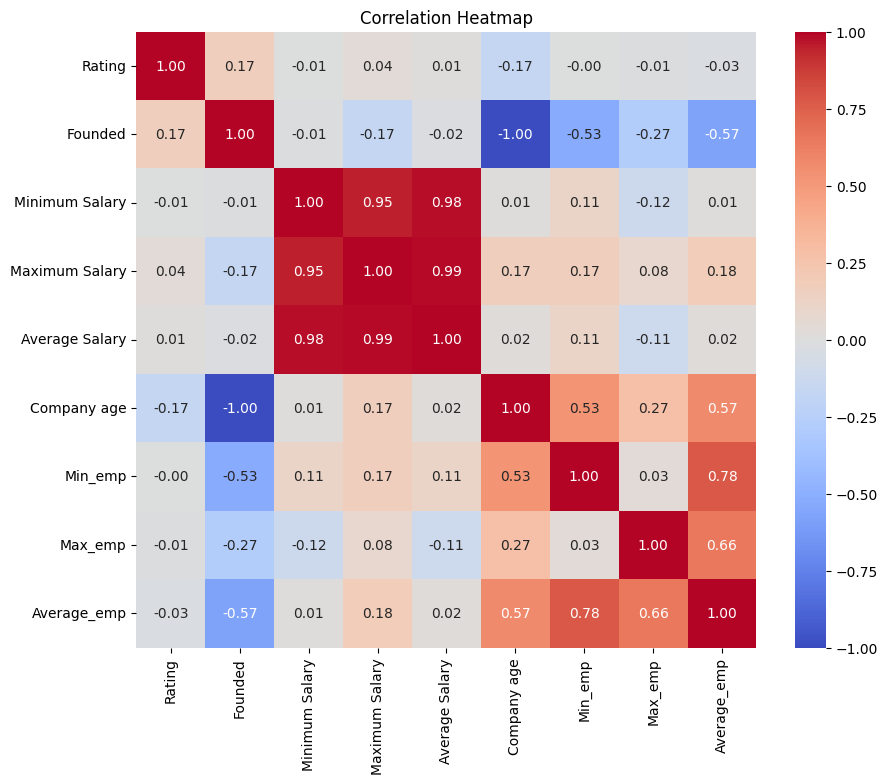

In [43]:
# Correlation Heatmap visualization code
numeric_df = Cleaned_df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

**Highly Correlated Salary Metrics**

Minimum Salary, Maximum Salary, and Average Salary: These salary-related variables show very strong positive correlations (coefficients close to 1.00). This suggests that companies' compensation structures are consistent—if one of these values is high, the others tend to be high as well.

**Strong Relationship Among Employee Counts**

Min_emp, Max_emp, and Average_emp: The various measures of employee count are also strongly positively correlated, indicating that companies with a higher minimum number of employees also tend to have a higher maximum and average employee count. This is an expected insight as these metrics together reflect company size.

**Inverse Relationship Between Company Age and Founded Year**

Founded vs. Company age: There is an almost perfect negative correlation (around -1.00) between the year a company was founded and its age. This is logical because the more recent the founding year (i.e., a higher "Founded" value), the younger the company becomes when calculating its age.

#### Chart - 15 - Pair Plot

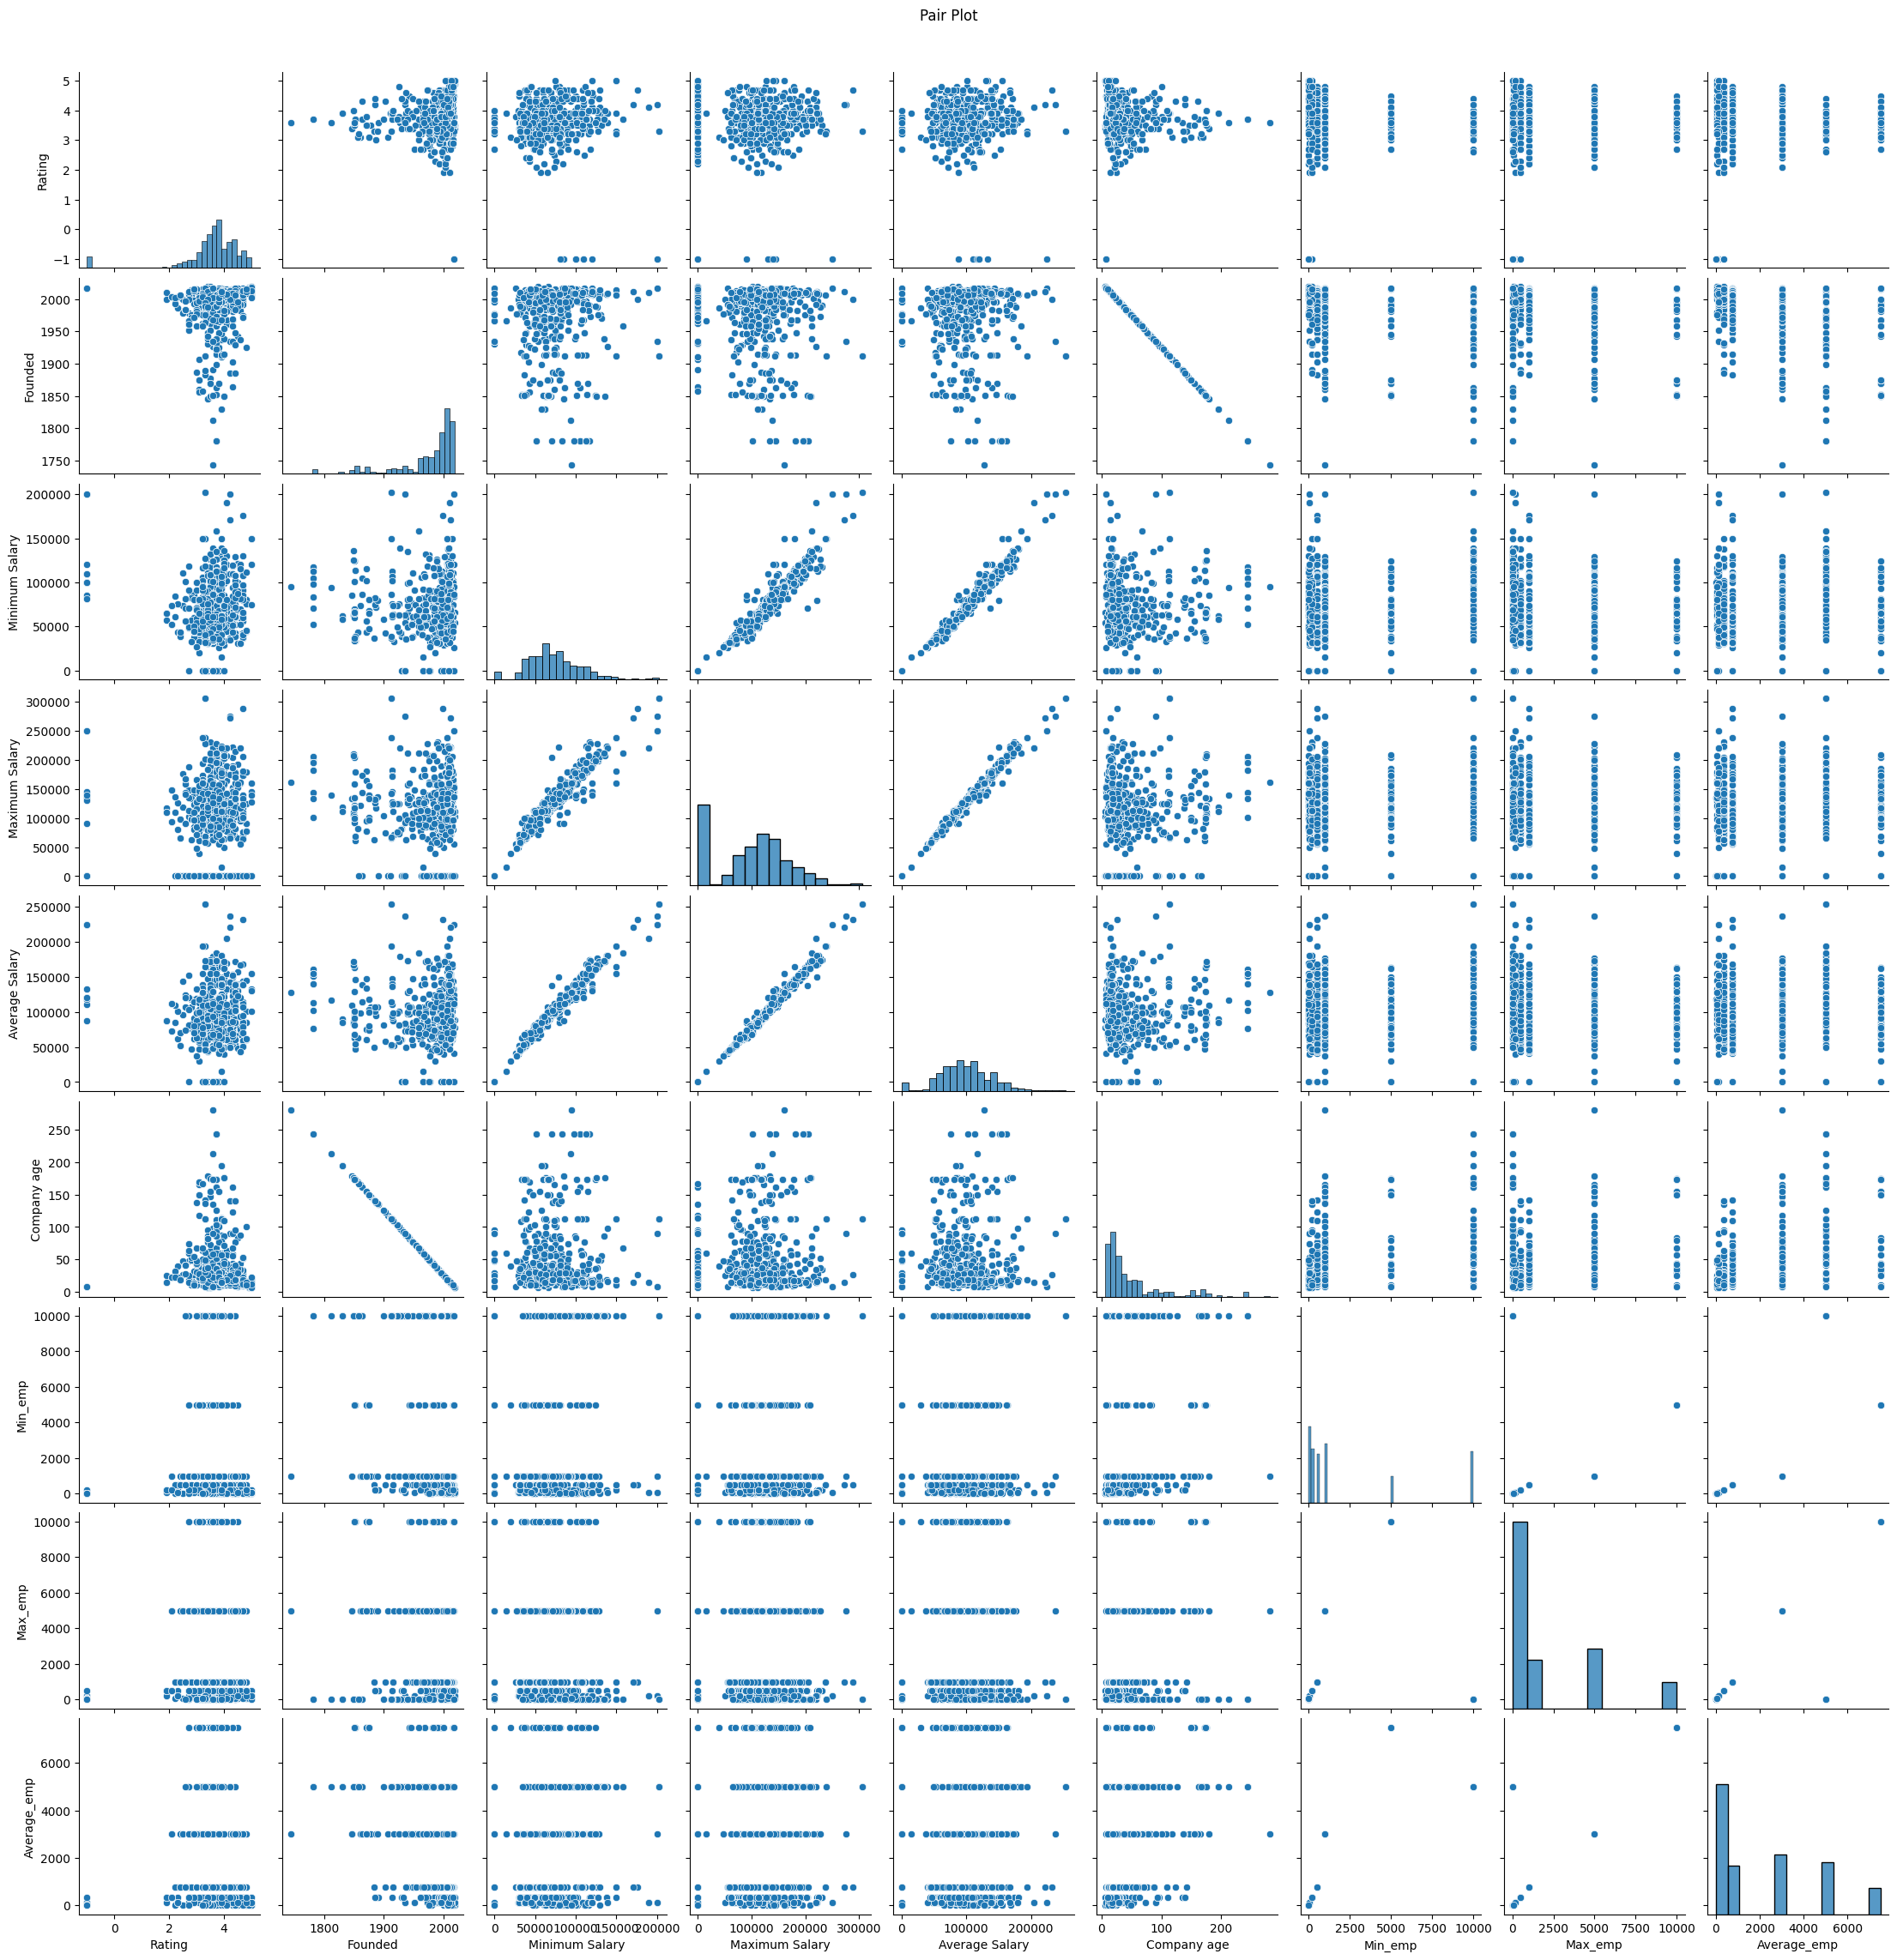

In [44]:
# Pair Plot visualization code
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot', y=1.02)
plt.show()

##### 2. What is/are the insight(s) found from the chart?

**Strong Correlation Between Salary Measures:** The scatter plots between average salary, minimum salary, and maximum salary reveal very strong positive correlations. This indicates that if a company pays a high average salary, its minimum and maximum salaries are also likely to be high. This consistency in salary structure reflects a coherent compensation policy across different roles or levels within companies.

**Positive Relationship with Revenue:** Multiple scatter plot panels indicate that companies with higher revenue tend to offer higher salaries. Similarly, higher revenue appears to be associated with more established organizations (i.e., older companies). The histograms on the diagonal also suggest that revenue is right-skewed—meaning while most companies report lower revenue, a few companies exhibit very high revenue figures.

**Rating’s Minimal Correlation:** The plots that compare the "Rating" variable with other metrics (salary, revenue, company age) tend to show little to no strong linear relationship. This suggests that the rating—likely derived from qualitative assessments or other dimensions not captured by pure financial or operational data—might be driven by factors beyond just these numerical variables.



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Companies with higher ratings tend to offer higher salaries.

**Null Hypothesis (H₀):** No significant difference in salaries between high-rated and low-rated companies.

**Alternative Hypothesis (H₁):** Higher-rated companies (≥4.0) offer significantly higher salaries.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

high_rated = df[df['Rating'] >= 4.0]['Average Salary'].dropna()
low_rated = df[df['Rating'] < 4.0]['Average Salary'].dropna()

t_stat, p_value = stats.ttest_ind(high_rated, low_rated, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Reject H₀: Higher-rated companies offer significantly higher salaries.")
else:
    print("Fail to reject H₀: No significant difference in salaries based on company rating.")


T-Statistic: 2.2114853930688505, P-Value: 0.02754695038806703
Reject H₀: Higher-rated companies offer significantly higher salaries.


##### Which statistical test have you done to obtain P-Value?

**t-test** was used to obtain the P-value

##### Why did you choose the specific statistical test?

The two-sample t-test is designed to compare the means of a continuous variable between two independent groups, making it a natural fit for this scenario.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Older Companies Pay More

Null Hypothesis (H₀): No significant difference in salaries between age of company

Alternative Hypothesis (H₁): Older companies pay more

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value

import numpy as np
from scipy.stats import chi2_contingency

df['Salary Category'] = np.where(df['Average Salary'] >= df['Average Salary'].median(), 'High', 'Low')
df['Company Age Category'] = np.where(df['Founded'] < 2000, 'Old', 'New')

contingency_table = pd.crosstab(df['Salary Category'], df['Company Age Category'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}, P-Value: {p_value}")

if p_value < 0.05:
    print("Reject H₀: Salary level is dependent on company age.")
else:
    print("Fail to reject H₀: No significant relationship between salary level and company age.")


Chi-Square Statistic: 0.5987617338549552, P-Value: 0.4390508710948158
Fail to reject H₀: No significant relationship between salary level and company age.


##### Which statistical test have you done to obtain P-Value?

P-Value was obtained using Chi-Squared test

##### Why did you choose the specific statistical test?

It tests the association between two categorical variables (Company Age & Salary Level).
Determines if company age influences the likelihood of paying higher salaries.
Works well when salary data is binned into categories instead of exact values.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Older Companies are rated high

Null Hypothesis (H₀): There is no significant difference in company ratings between older and newer companies.

Alternative Hypothesis (H₁): Older companies have significantly higher ratings than newer companies.


#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import kendalltau

df_clean = df[['Company age', 'Rating']].dropna()

# Compute correlation
kendall_corr, p_value = kendalltau(df_clean['Company age'], df_clean['Rating'])


print(f"Kendall’s Tau: {kendall_corr}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject H₀: There is enough evidence that company age has effect in company rating")
else:
    print("Fail to reject H₀: No significant relationship between Compay Rating and company age.")


Kendall’s Tau: -0.2253457367298586, P-value: 1.0966368579043177e-21
Reject H₀: There is enough evidence that company age has effect in company rating


##### Which statistical test have you done to obtain P-Value?

Kendall's Tau test was used to obtain P-value

##### Why did you choose the specific statistical test?

The dataset has only 859 rows, and Kendall’s Tau performs better when dealing with small sample sizes.

Since many companies may have the same founding year or rating, Kendall’s Tau is more robust in such cases

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [48]:
# Handling Missing Values & Missing Value Imputation

Cleaned_df.isnull().sum()[Cleaned_df.isnull().sum()>0]

,0
Size,26
Founded,97
Competitors,634
Minimum Salary,214
Average Salary,214
Company age,97
Min_emp,15
Average_emp,15


In [49]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy ='median')
mean_imputer = SimpleImputer(strategy='mean')

#founded is not normally distriubted, hence using median imputation
Cleaned_df['Founded'] = median_imputer.fit_transform(Cleaned_df[['Founded']])

Cleaned_df.drop('Competitors', axis = 1,inplace = True)

#minimum salary is normally distributed, hence using mean imputation
Cleaned_df['Minimum Salary'] = mean_imputer.fit_transform(Cleaned_df[['Minimum Salary']])

#since minimum salary's missing values are handeled, we are recalculating the average salary to fill in the missing values
Cleaned_df['Average Salary'] = (Cleaned_df['Maximum Salary'] + Cleaned_df['Minimum Salary'])/2

#founded missing values have been handeled, recalculating the company age to fill in missing values
Cleaned_df['Company age'] = 2025 - Cleaned_df['Founded']

#replacing the missing values in minimum number of employees with median values as the distribution is not normal
Cleaned_df['Min_emp'] = median_imputer.fit_transform(Cleaned_df[['Min_emp']])

#recalculating avg emp column as the minimum emp is recalculated
Cleaned_df['Average_emp'] = (Cleaned_df['Max_emp'] + Cleaned_df['Min_emp'])/2

#Replaced Unknow and -1 from Type of Ownership with Other Organization
Cleaned_df['Type of ownership'].replace(['Unknown','-1'],'Other Organization',inplace = True)

#Some of the companies ratings are -1 which is not possible, these may be defalut values filling in for missing values
Cleaned_df['Rating'].replace(-1, round(Cleaned_df['Rating'].mean(),1), inplace=True)

<ipython-input-49-878d59e8b632>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Cleaned_df['Type of ownership'].replace(['Unknown','-1'],'Other Organization',inplace = True)
<ipython-input-49-878d59e8b632>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

In [50]:
Cleaned_df.isnull().sum()[Cleaned_df.isnull().sum()>0]

,0
Size,26


In [51]:
Cleaned_df['Founded'] = Cleaned_df['Founded'].astype(int)

#### What all missing value imputation techniques have you used and why did you use those techniques?

- Founded column is not normally distriubted, hence used median imputation
- Competitiors column had over 66% missing values, hence dropped the column
- Replaced the missing values in minimum salary with mean imputation as the data was normally distributed
- Recalculated the missing values in average salary as missing values in minimum salary were handled
- Recalculated companies age after handling missing values in the Founded column
- Replaced missing values in minimum employees with median values as the data was not normally distributed
- Recalculated the average emp as missing values in min employees were handeled
- Missing values in size column were not handeled as it was divided into min and max employees and missing values of those columns were handeled seprately
- Replaced Unknow and -1 from Type of Ownership with Other Organization
- Some of the companies ratings are -1 which is not possible, these may be defalut values filling in for missing values. Replaced them with mean ratings as the distribution was normal

### 2. Handling Outliers

In [52]:
# Handling Outliers & Outlier treatments
Cleaned_df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Minimum Salary',
       'Maximum Salary', 'Average Salary', 'Company Name clean', 'Company age',
       'Min_emp', 'Max_emp', 'Average_emp'],
      dtype='object')

In [53]:
numerical_columns = Cleaned_df.select_dtypes(include = ['float64','int64'])
numerical_columns.head(2)

,Rating,Founded,Minimum Salary,Maximum Salary,Average Salary,Company age,Min_emp,Max_emp,Average_emp
0,3.8,1973,53000.0,91000.0,72000.0,52.0,501.0,1000,750.5
1,3.4,1984,63000.0,112000.0,87500.0,41.0,10000.0,0,5000.0


In [54]:
def IQR_outlier(column):
    Q1 = numerical_columns.quantile(0.25)
    Q3 = numerical_columns.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = numerical_columns[(numerical_columns[column] < lower_bound[column]) | (numerical_columns[column] > upper_bound[column])]

    print(f"Number of outliers in {column}: {len(outliers)}")
    print(f'Outliersi in {column} are {outliers}')

for column in numerical_columns.columns:
    IQR_outlier(column)

Number of outliers in Rating: 8
Outliersi in Rating are      Rating  Founded  Minimum Salary  Maximum Salary  Average Salary  \
85      1.9     2000         57000.0        118000.0         87500.0   
431     2.1     1996         74000.0        149000.0        111500.0   
488     1.9     2010         65000.0        110000.0         87500.0   
534     2.1     2003         52000.0         93000.0         72500.0   
642     2.1     1996         74000.0        149000.0        111500.0   
726     1.9     2010         65000.0        110000.0         87500.0   
804     2.1     2003         52000.0         93000.0         72500.0   
864     2.1     1996         74000.0        149000.0        111500.0   

     Company age  Min_emp  Max_emp  Average_emp  
85          25.0     51.0      200        125.5  
431         29.0    201.0      500        350.5  
488         15.0    201.0      500        350.5  
534         22.0   1001.0     5000       3000.5  
642         29.0    201.0      500        350

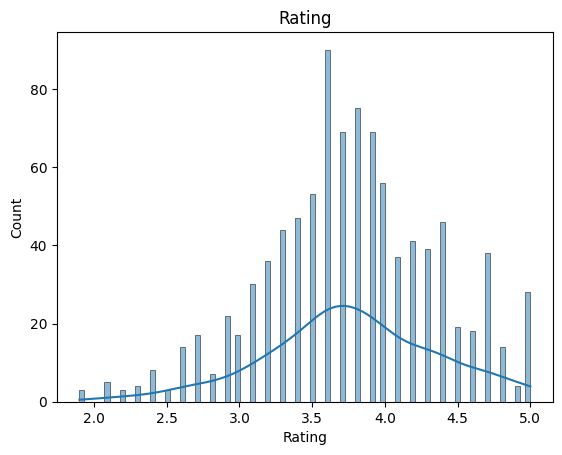

In [55]:
sns.histplot(Cleaned_df['Rating'], bins=90, edgecolor='black', kde=True)
plt.title('Rating')
plt.show()

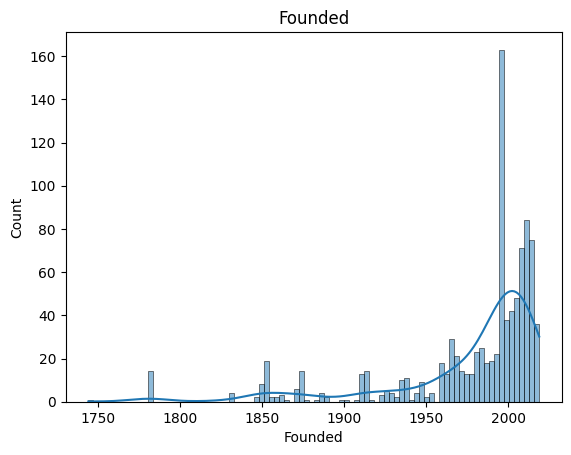

In [56]:
sns.histplot(Cleaned_df['Founded'], bins=90, kde= True, edgecolor='black')
plt.title('Founded')
plt.show()

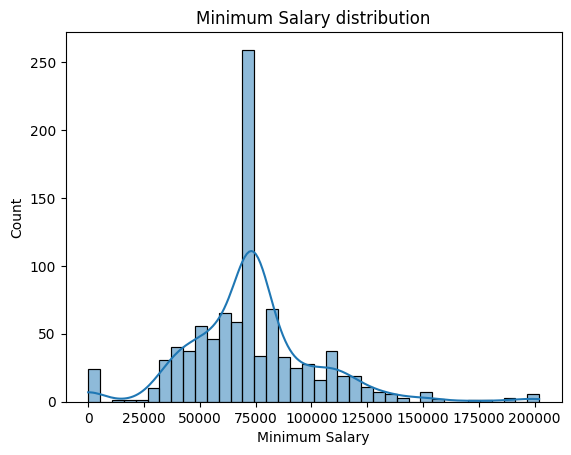

In [57]:
sns.histplot(Cleaned_df['Minimum Salary'], kde = True, edgecolor = 'black')
plt.title('Minimum Salary distribution')
plt.show()

In [58]:
q1 = Cleaned_df['Minimum Salary'].quantile(0.25)
q3 = Cleaned_df['Minimum Salary'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_outlier = Cleaned_df[Cleaned_df['Minimum Salary'] < lower_bound]["Minimum Salary"]

Cleaned_df['Minimum Salary'] = np.where(Cleaned_df['Minimum Salary'] < lower_bound, lower_bound, Cleaned_df['Minimum Salary'])

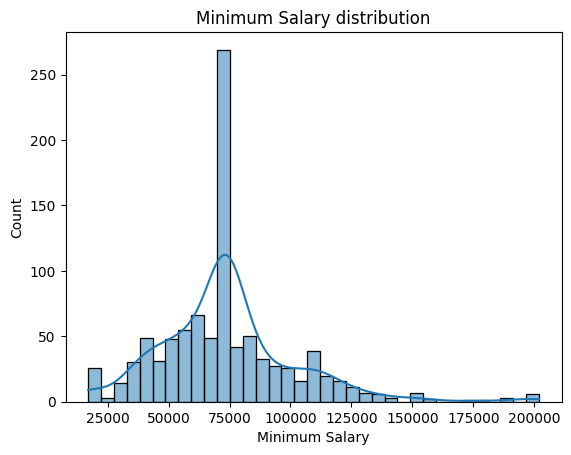

In [59]:
#rechecking the distribution of salary
sns.histplot(Cleaned_df['Minimum Salary'], kde = True, edgecolor = 'black')
plt.title('Minimum Salary distribution')
plt.show()

In [60]:
#recalculating the average salary after handling the outliers
Cleaned_df['Average Salary'] = (Cleaned_df['Maximum Salary'] + Cleaned_df['Minimum Salary'])/2

In [61]:
Cleaned_df['Min_emp'] = Cleaned_df['Min_emp'].astype(int)

In [62]:
Cleaned_df.loc[(Cleaned_df['Max_emp'] == 0) & (Cleaned_df['Min_emp'] == 10000), 'Min_emp'] = Cleaned_df['Min_emp'].median()

In [63]:
Cleaned_df.loc[Cleaned_df['Max_emp'] == 0, 'Max_emp'] = 10000

##### What all outlier treatment techniques have you used and why did you use those techniques?

- Some companies had rating of -1, which may be fill in values for missing values, hence replaced them mean values

- Companies those were founded during 1750's were shown as ouliers, since they are genuine values, we are taking no action

- Minimum salaries of some companies were way lower, hence replaced them with minimum acceptable values

- Company age has outliers, but those are entirely dependent of when the company was founded, hence leaving those values as it is

- During initial split, the values of maximum employees were entered in minimum employees, corrected those to fix the outliers

### 3. Categorical Encoding

In [64]:
# Encode your categorical columns

Cleaned_df['Sector'] = Cleaned_df['Sector'].astype("category")
Cleaned_df['Type of ownership'] = Cleaned_df['Type of ownership'].astype("category")

In [65]:
!pip install category_encoders

import category_encoders as ce
label_encoder = ce.OrdinalEncoder()
Cleaned_df['encoded_sector'] = label_encoder.fit_transform(Cleaned_df['Sector'])
Cleaned_df['encoded_type_of_ownership'] = label_encoder.fit_transform(Cleaned_df['Type of ownership'])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


#### What all categorical encoding techniques have you used & why did you use those techniques?

There were two categorical columns, Sector and Type of company ownership. Both of these columns were encoded  with label encoder.

Reason for using Label Encoder: Both of these columns had more than few categorical values, hence used label encoder to assign individual values also not increasing dimentionality

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [66]:
!pip install contractions
!pip install nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')


from transformers import T5Tokenizer, T5ForConditionalGeneration
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag
nltk.download('punkt', force=True)
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger', force=True)
nltk.download('wordnet', force=True)
nltk.download('stopwords', force=True)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
model_t5 = T5ForConditionalGeneration.from_pretrained("t5-small")
tokenizer_t5 = T5Tokenizer.from_pretrained("t5-small")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.9 MB/s eta 0:00:00


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zi

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [67]:
# Expand Contraction

def expand_contractions(text):
  return contractions.fix(text)


#### 2. Lower Casing

In [68]:
# Lower Casing
def lower_casing(text):
  return text.lower()

#### 3. Removing Punctuations

In [69]:
# Remove Punctuations
def remove_punctuations(text):
  return re.sub(r'[^\w\s]', '', text)

#### 4. Removing URLs & Removing words and digits contain digits.

In [70]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [71]:
# Remove Stopwords
# Remove White spaces


def remove_stopwords(text):
  text = " ".join(text.split())
  filtered_words = [word for word in text.split() if word.lower() not in stop_words]
  return ' '.join(filtered_words)


#### 6. Rephrase Text

In [72]:
# Rephrase Text
model_t5 = T5ForConditionalGeneration.from_pretrained("t5-small")
tokenizer_t5 = T5Tokenizer.from_pretrained("t5-small")

def rephrase_text(text):
    input_text = "paraphrase: " + text + " </s>"
    encoding = tokenizer_t5.encode_plus(input_text, return_tensors="pt", max_length=512, truncation=True)

    output = model_t5.generate(
        encoding["input_ids"],
        max_length=512,
        num_return_sequences=1,
        temperature=0.7,
        top_k=50
    )

    return tokenizer_t5.decode(output[0], skip_special_tokens=True)

#### 7. Tokenization

In [73]:
# Tokenization
def tokenize_text(text):
    return word_tokenize(text)

#### 8. Text Normalization

In [74]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
nltk.download('wordnet')
nltk.download('omw-1.4')

# Function to normalize tokens
def normalize_tokens(tokens):
    return [lemmatizer.lemmatize(token.lower()) for token in tokens]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


##### Which text normalization technique have you used and why?

We have used Lemmatization. It was preferred over stemming because it produces more meaningful and linguistically accurate base forms of words

#### 9. Part of speech tagging

In [75]:
# POS Taging

def pos_tagging(text):
    return pos_tag(text)  # POS Tagging


#### 10. Text Vectorization

In [76]:
# Vectorizing Text
def tfidf_vectorize_corpus(texts):
    vectorizer = TfidfVectorizer(max_features=500)
    tfidf_matrix = vectorizer.fit_transform(texts)
    return tfidf_matrix, vectorizer

In [77]:
def preprocess_text(text):
    text = expand_contractions(text)
    text = lower_casing(text)
    text = remove_punctuations(text)
    text = remove_stopwords(text)
    text = tokenize_text(text)
    text = normalize_tokens(text)
    text = pos_tagging(text)
    text = " ".join([word for word, tag in text])
    return text

Cleaned_df['preprocessed_text'] = Cleaned_df['Job Description'].apply(preprocess_text)

tfidf_matrix, vectorizer = tfidf_vectorize_corpus(Cleaned_df['preprocessed_text'])
Cleaned_df['processed_job_description'] = [row.toarray().flatten() for row in tfidf_matrix]

In [78]:
tfidf_matrix = np.array(Cleaned_df['processed_job_description'].tolist())
print(tfidf_matrix.shape)

(956, 500)


In [79]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
tfidf_pca = pca.fit_transform(tfidf_matrix)

tfidf_pca_df = pd.DataFrame(tfidf_pca, index = Cleaned_df.index, columns=[f'tfidx_pca {i}' for i in range(10)])

##### Which text vectorization technique have you used and why?

Text Vectorization used: TF-IDF
Reason : To retain importance of the text

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [80]:
# Manipulate Features to minimize feature correlation and create new features

Cleaned_df['encoded_company_name'] = Cleaned_df.groupby('Company Name clean')['Average Salary'].transform('mean')
Cleaned_df['encoded_job_title'] = Cleaned_df.groupby('Job Title')['Average Salary'].transform('mean')

#### 2. Feature Selection

In [81]:
# Select your features wisely to avoid overfitting
numerical_columns = Cleaned_df.select_dtypes(include = ['float64','int64'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant for intercept
X = numerical_columns.dropna()
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factors:")
print(vif_data)


Variance Inflation Factors:
                      Feature        VIF
0                       const   0.000000
1                      Rating   1.183715
2                     Founded        inf
3              Minimum Salary        inf
4              Maximum Salary        inf
5              Average Salary        inf
6                 Company age        inf
7                     Min_emp   3.314569
8                     Max_emp   7.079488
9                 Average_emp  12.654870
10             encoded_sector   1.145816
11  encoded_type_of_ownership   1.172787
12       encoded_company_name   6.934917
13          encoded_job_title   3.973519


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [82]:
numerical_columns.drop(['Minimum Salary','Maximum Salary','Founded','Min_emp','Max_emp'],inplace=True, axis=1)


In [83]:
X = numerical_columns.dropna()
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factors:")
print(vif_data)

Variance Inflation Factors:
                     Feature        VIF
0                      const  63.838618
1                     Rating   1.107549
2             Average Salary  11.346213
3                Company age   1.489584
4                Average_emp   1.589685
5             encoded_sector   1.086338
6  encoded_type_of_ownership   1.131046
7       encoded_company_name   6.888882
8          encoded_job_title   3.815134


In [84]:
numerical_columns = pd.concat([numerical_columns, tfidf_pca_df], axis = 1)

##### What all feature selection methods have you used  and why?

Used VIF to figureout features with multicollinearity and removed data which had high collinearity

##### Which all features you found important and why?

Feature which were not redundant were selected

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [85]:
# Transform Your data
numerical_columns['Company age'] = np.log1p(numerical_columns['Company age'])

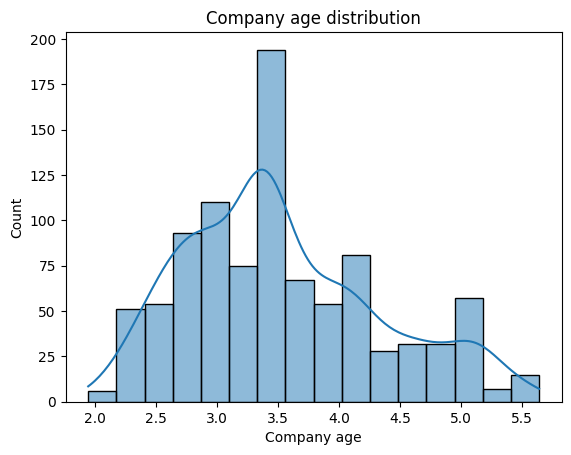

In [86]:
sns.histplot(numerical_columns['Company age'], kde = True, edgecolor = 'black')
plt.title('Company age distribution')
plt.show()

### 6. Data Scaling

In [87]:
# Scaling your data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns[['Rating','Average Salary','Average_emp','encoded_sector','encoded_type_of_ownership','encoded_company_name','encoded_job_title']] = scaler.fit_transform(numerical_columns[['Rating','Average Salary','Average_emp','encoded_sector','encoded_type_of_ownership','encoded_company_name','encoded_job_title']])

##### Which method have you used to scale you data and why?

Standard scaling was used to make sure data is normalized, less skewed, and optimized for Linear Regression

### 7. Data Splitting

In [88]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

X = numerical_columns.drop('Average Salary', axis=1)
y = numerical_columns['Average Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why?

The data was split into the ration of 8:2

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [89]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression




In [90]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Fit the Algorithm
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

# Predict on the model
y_pred = linear_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2:.2f}")
print(f"RMSE Score: {rmse:.2f}")

R2 Score: 0.92
RMSE Score: 0.28


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

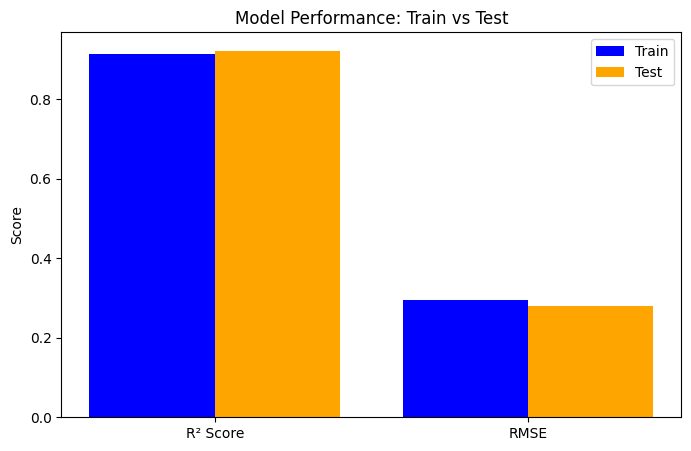

In [91]:
# Visualizing evaluation Metric Score chart

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# **Visualizing the Scores**
metrics = ['R² Score', 'RMSE']
train_scores = [r2_train, rmse_train]
test_scores = [r2_test, rmse_test]


x = np.arange(len(metrics))

plt.figure(figsize=(8, 5))
plt.bar(x - 0.2, train_scores, width=0.4, label='Train', color='blue')
plt.bar(x + 0.2, test_scores, width=0.4, label='Test', color='orange')

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Performance: Train vs Test")
plt.legend()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [92]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X = numerical_columns.drop('Average Salary', axis=1)
y = numerical_columns['Average Salary']

# Fit the Algorithm
r2_scores = []
rmse_scores = []

for train_index, test_index in kfold.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  linear_model = LinearRegression()
  linear_model.fit(X_train, y_train)

# Predict on the model

  y_pred = linear_model.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mse)

  r2_scores.append(r2)
  rmse_scores.append(rmse)

print(f"Average R2 Score: {np.mean(r2_scores):.2f}")
print(f"Average RMSE Score: {np.mean(rmse_scores):.2f}")

Average R2 Score: 0.91
Average RMSE Score: 0.30


##### Which hyperparameter optimization technique have you used and why?

Linear Regression doesn't have any hyper parameter

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [93]:
metric_chart = {'r2':[r2_test,r2], 'rmse':[rmse_test,rmse]}
metric_chart = pd.DataFrame(metric_chart, index=['before','after'])
metric_chart

,r2,rmse
before,0.922490,0.279639
after,0.902547,0.286947


Cross validation shows slight imporvement in model performance

### ML Model - 2 Random Forest Regressor

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

R2 Score: 0.90
RMSE Score: 0.29


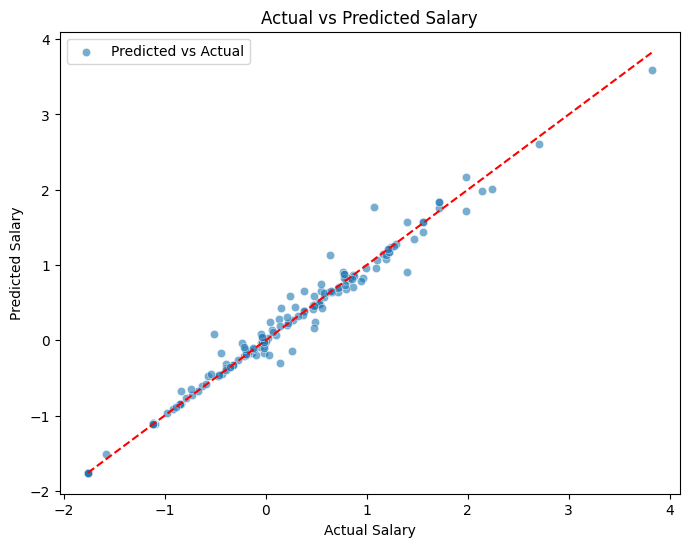

In [94]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestRegressor

X = numerical_columns.drop(columns=["Average Salary"])
y = numerical_columns["Average Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

randomforestregressor = RandomForestRegressor(n_estimators=100, random_state=42)
randomforestregressor.fit(X_train, y_train)

y_pred = randomforestregressor.predict(X_test)

r2_rfr = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse_rfr = np.sqrt(mse)

print(f"R2 Score: {r2:.2f}")
print(f"RMSE Score: {rmse:.2f}")


plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6,label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--',label="Perfect Prediction Line")  # 45-degree line
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

In the above chart, the diagonal line is the perfect prediction and the scattered points are the predictions made.

#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
from scipy.stats import randint
import numpy as np

rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)


# Define hyperparameter distribution
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rfr = RandomForestRegressor(random_state=42)

# Randomized Search with multiple scoring metrics
scoring = {'r2': 'r2', 'rmse': rmse_scorer}

random_search = RandomizedSearchCV(
    rfr, param_distributions=param_dist,
    n_iter=10, cv=5, scoring=scoring,
    refit='r2', random_state=42, n_jobs=-1
)

random_search.fit(X, y)

# Best parameters
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best R² Score: {random_search.best_score_:.4f}")

# Retrieve RMSE for the best model (convert back to positive value)
best_rmse_rfrc = -random_search.cv_results_['mean_test_rmse'][random_search.best_index_]
best_r2_rfrc = random_search.cv_results_['mean_test_r2'][random_search.best_index_]
print(f"Best RMSE Score: {best_rmse_rfrc:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 108}
Best R² Score: 0.9689
Best RMSE Score: nan


##### Which hyperparameter optimization technique have you used and why?

We have used Randomsearchcv to find the best parameters. As this takes less computational power while searching for best pararmeters

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [96]:
rfr_metric = {'r2':[r2_rfr,best_r2_rfrc], 'rmse':[rmse_rfr,best_rmse_rfrc]}
rfr_metric = pd.DataFrame(rfr_metric, index=['before','after'])
rfr_metric

,r2,rmse
before,0.983582,0.128699
after,0.968854,NaN


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

r2 score for initial random forest is 0.98 which shows the model fit is very good. There is a minute reduction in r2 score for cross validated random forest however it still indicates a good fit.

RMSE score for inital random forest is very low, indicating models perfomance is good in predicting values. However while trying to get RMSE score for cross validated random forest, it always results in nan value. This may be due to several issues, for instance this may occur due to Data Variability.

### ML Model - 3 Stacking Regressor

In [97]:
# ML Model - 3 Implementation

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor

X = numerical_columns.drop('Average Salary', axis=1)
y = numerical_columns['Average Salary']

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = [
    ('xgb', XGBRegressor(random_state=42)),
    ('bayesian_ridge', BayesianRidge()),
    ('svr', SVR())
]

# Define meta-model
meta_model = Ridge()

# Define stacking model
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model
)

stacking_model.fit(X_train, y_train)

# Predict on the test set
y_pred = stacking_model.predict(X_test)

# Calculate R² and RMSE
stacking_r2_score_final = r2_score(y_test, y_pred)
stacking_rmse_score_final = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Stacking Regressor R² Score: {stacking_r2_score_final:.4f}")
print(f"Stacking Regressor RMSE Score: {stacking_rmse_score_final:.4f}")

Stacking Regressor R² Score: 0.9854
Stacking Regressor RMSE Score: 0.1213


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Explanation of the ML Model**

**Stacking Regressor**

**Overview: Stacking (or stacked generalization)** is an ensemble technique that combines predictions from multiple base models using a meta-model to improve predictive performance. In this case, the base models are XGBoost, Bayesian Ridge, and SVR, and the meta-model is Ridge regression. The stacking process works as follows:

**Base Models:** Each base model (XGBoost, Bayesian Ridge, SVR) is trained on the training data.

**Base Predictions:** Each base model generates predictions for the training data.

**Meta-Model Training:** The meta-model (Ridge regression) is trained on the base models’ predictions to learn how to combine them optimally.

**Final Prediction:** For the test set, the base models generate predictions, which are then combined by the meta-model to produce the final output.


**Performance Metrics**

**R² Score** : Measures the proportion of variance in the target (Average Salary) explained by the model. Ranges from 0 to 1 (higher is better); negative values indicate worse performance than a mean predictor.

**RMSE (Root Mean Squared Error):** Measures the average magnitude of prediction errors, with errors squared before averaging and taking the square root. Lower values are better.



#### 2. Cross- Validation & Hyperparameter Tuning

In [98]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from scipy.stats import uniform, randint

X = numerical_columns.drop('Average Salary', axis=1)
y = numerical_columns['Average Salary']

# Parameter distributions

xgb_param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

bayesian_ridge_param_dist = {
    'alpha_1': uniform(1e-6, 1e-4),
    'alpha_2': uniform(1e-6, 1e-4),
    'lambda_1': uniform(1e-6, 1e-4),
    'lambda_2': uniform(1e-6, 1e-4)
}

svr_param_dist = {
    'C': uniform(0.1, 10),
    'epsilon': uniform(0.01, 0.5),
    'kernel': ['rbf', 'linear']
}

In [99]:
# Initialize base models
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
bayesian_ridge = BayesianRidge()
svr = SVR()

# RandomizedSearchCV for XGBoost
xgb_search = RandomizedSearchCV(
    xgb, param_distributions=xgb_param_dist, n_iter=10, cv=5,
    scoring='r2', random_state=42, n_jobs=-1
)
xgb_search.fit(X, y)
print("XGBoost Best Parameters:", xgb_search.best_params_)
print("XGBoost Best R² Score:", xgb_search.best_score_)

# RandomizedSearchCV for Bayesian Ridge
br_search = RandomizedSearchCV(
    bayesian_ridge, param_distributions=bayesian_ridge_param_dist, n_iter=10, cv=5,
    scoring='r2', random_state=42, n_jobs=-1
)
br_search.fit(X, y)
print("Bayesian Ridge Best Parameters:", br_search.best_params_)
print("Bayesian Ridge Best R² Score:", br_search.best_score_)

# RandomizedSearchCV for SVR
svr_search = RandomizedSearchCV(
    svr, param_distributions=svr_param_dist, n_iter=10, cv=5,
    scoring='r2', random_state=42, n_jobs=-1
)
svr_search.fit(X, y)
print("SVR Best Parameters:", svr_search.best_params_)
print("SVR Best R² Score:", svr_search.best_score_)

XGBoost Best Parameters: {'colsample_bytree': 0.9140703845572055, 'learning_rate': 0.06990213464750791, 'max_depth': 9, 'n_estimators': 113, 'subsample': 0.786705157299192}
XGBoost Best R² Score: 0.9667988191634169
Bayesian Ridge Best Parameters: {'alpha_1': 6.0241456886204246e-05, 'alpha_2': 5.645041271999772e-06, 'lambda_1': 6.175448519014385e-05, 'lambda_2': 1.8052412368729156e-05}
Bayesian Ridge Best R² Score: 0.9072947804450481
SVR Best Parameters: {'C': 3.4370861113902182, 'epsilon': 0.08143340896097039, 'kernel': 'rbf'}
SVR Best R² Score: 0.9428009677993036


In [100]:
# Define base models with best parameters
base_models = [
    ('xgb', XGBRegressor(**xgb_search.best_params_, random_state=42)),
    ('bayesian_ridge', BayesianRidge(**br_search.best_params_)),
    ('svr', SVR(**svr_search.best_params_))
]

# Define meta-model
meta_model = Ridge(alpha=1.0)

# Define stacking model with cross-validation for OOF predictions
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5  # Inner cross-validation for OOF predictions
)

In [101]:
# Initialize K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics
r2_scores = []
rmse_scores = []

# Perform cross-validation
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X)):
    print(f"Fold {fold_idx + 1}")
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Fit the stacking model
    stacking_model.fit(X_train, y_train)

    # Predict on validation fold
    y_pred = stacking_model.predict(X_val)

    # Calculate metrics
    r2 = r2_score(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    r2_scores.append(r2)
    rmse_scores.append(rmse)

    print(f"Fold R²: {r2:.4f}, Fold RMSE: {rmse:.4f}")

stacking_final_cv_r2 = round(np.mean(r2_scores),4)
stacking_final_cv_rmse = round(np.mean(rmse_scores),4)

# Compute mean and standard deviation of metrics
print("\nFinal Stacking Results:")
print(f"Mean R² Score: {stacking_final_cv_r2}")
print(f"Mean RMSE: {stacking_final_cv_rmse}")

# Fit the stacking model on the entire dataset for inspection
stacking_model.fit(X, y)
print(f"Meta-model coefficients: {stacking_model.final_estimator_.coef_}")

Fold 1
Fold R²: 0.9828, Fold RMSE: 0.1316
Fold 2
Fold R²: 0.9598, Fold RMSE: 0.2068
Fold 3
Fold R²: 0.9652, Fold RMSE: 0.1933
Fold 4
Fold R²: 0.9784, Fold RMSE: 0.1469
Fold 5
Fold R²: 0.9656, Fold RMSE: 0.1705

Final Stacking Results:
Mean R² Score: 0.9704
Mean RMSE: 0.1698
Meta-model coefficients: [0.82385791 0.01959001 0.1745897 ]


##### Which hyperparameter optimization technique have you used and why?

Random grid search was used for hyperparameter optimization as it covers a range of values, while lessening the computational requirement.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is only a slight improvement from initial stacking and cross validated/hyperparameter tuned stacking.

This may be due to the small size of the dataset. A larger dataset might show huge difference in performance

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Two metrics were used in model evaluation

R2 score to check the modelfit

RMSE to check the model performance and for easy interpretability

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Final model selected was Stacking with Cross validation, as so far it is the most sophisticated and versatile model.  

It covers a wide verity of models making it more robust

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

PermutationExplainer explainer: 193it [11:05,  3.50s/it]


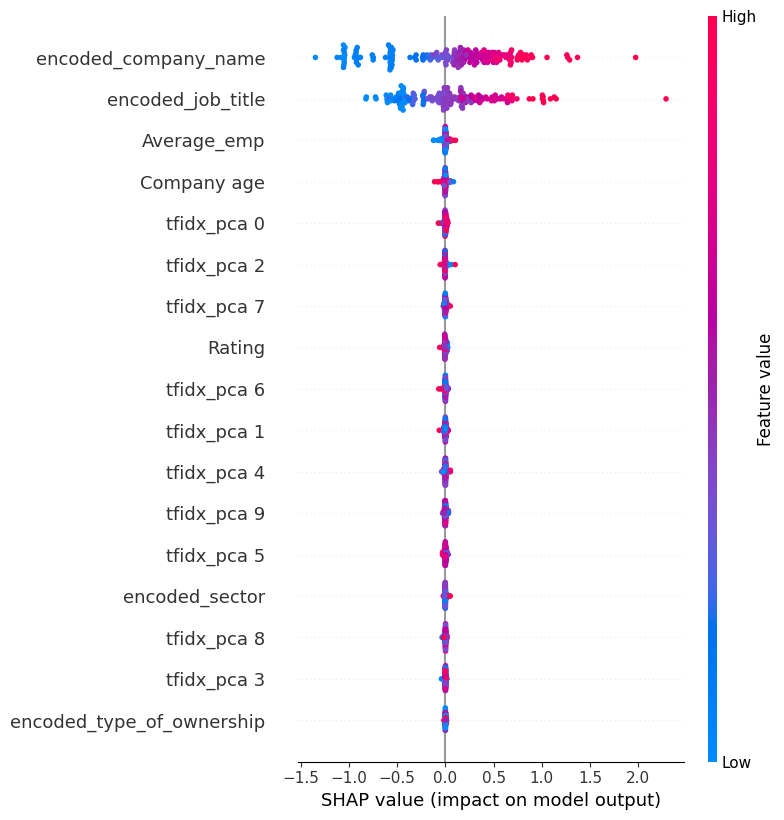

In [102]:
import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(stacking_model.predict, X_train)
shap_values = explainer(X_test)

# Summary Plot (Global Feature Importance)
shap.summary_plot(shap_values, X_test)

**X-Axis:** Features (Y-Axis):

The features are listed on the y-axis, ranked by their overall importance (from top to bottom). In your case:
encoded_company_name, encoded_job_title, Average_emp, Company age, tfidx_pca_0, ..., encoded_type_of_ownership.

Importance is determined by the average absolute SHAP value (how much the feature impacts predictions on average).

**SHAP Values (X-Axis):**
The x-axis represents the SHAP value, which quantifies the contribution of each feature to the prediction for a given instance.

Positive SHAP values (right side) increase the predicted Average Salary.

Negative SHAP values (left side) decrease the predicted Average Salary.

The range (-1.5 to 2.0) shows the magnitude of impact.


**Dominant Features:**
encoded_company_name and encoded_job_title are the strongest predictors of Average Salary. This aligns with intuition: the company you work for and your role (e.g., senior vs. junior) heavily influence pay.

Average_emp and Company age also play significant roles, with larger and older companies generally paying more.

**Text Features (TF-IDF PCA):**

The TF-IDF PCA components contribute but have a smaller impact. They likely capture nuanced patterns in job descriptions (e.g., specific skills or responsibilities) that affect salary, but their influence is less direct than job title or company name.

tfidx_pca_0 has a notable negative effect when its value is high, suggesting it might represent terms associated with lower-paying roles.


**Less Influential Features:**

encoded_sector and encoded_type_of_ownership have minimal impact, indicating that industry sector and company ownership type are less critical for salary prediction in this dataset.








## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [105]:
# Save the File
import joblib

# Save the model to a file
joblib.dump(stacking_model, 'stacking_model.pkl')

['stacking_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [104]:
# Load the File and predict unseen data.

loaded_model = joblib.load('stacking_model.pkl')
# Use the loaded model for predictions
load_pred = loaded_model.predict(X_test)
r2_load = r2_score(y_test, load_pred)
rmse_load = np.sqrt(mean_squared_error(y_test, load_pred))

print(f"R2 Score: {r2_load:.2f}")
print(f"RMSE Score: {rmse_load:.2f}")

R2 Score: 1.00
RMSE Score: 0.04


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully analyzed salary trends in the tech industry using a 2017 Glassdoor dataset, addressing key questions about salary variations by job position, company size, and location.

Through extensive exploratory data analysis (EDA), 15 insightful visualizations revealed patterns such as salary disparities, the prevalence of mid-sized companies, and high-demand job locations.

Feature engineering, including TF-IDF vectorization of job descriptions and categorical encoding, enabled robust model development.

Three machine learning models—Linear Regression, Random Forest Regressor, and Stacking Regressor—were implemented, with the Stacking Regressor (combining XGBoost, Bayesian Ridge, and SVR) achieving the best performance after cross-validation and hyperparameter tuning **(R²: 0.97, RMSE:  0.17)**.

SHAP analysis highlighted encoded_job_title and encoded_company_name as the most influential features for salary prediction.

The final model was saved for deployment, providing a reliable tool for estimating salaries based on job attributes, which can benefit job seekers, employers, and policymakers in understanding and navigating compensation trends.




### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***